# Building a Linear Regression Model using python

In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
h=pd.read_csv("Raw_Housing_Prices.csv")

In [342]:
h.describe(include='all')

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,21613,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613,21613,...,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
unique,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,15 April 2016,NaN,NaN,NaN,NaN,NaN,NaN,No,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2231,NaN,NaN,NaN,NaN,NaN,NaN,21450,19489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,NaN,NaN,...,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,NaN,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,NaN,NaN,...,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,NaN,NaN,...,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,NaN,NaN,...,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,NaN,NaN,...,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,NaN,NaN,...,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


# Handling missing values

In [343]:
h.isnull().sum()


ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [344]:
# Removing records with empty 'sale price' column as they are not useful to train the model
h.dropna(inplace=True,axis=0,subset=['Sale Price'])

In [345]:
h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

# Few independent variables needed to be handled with misssing values

In [346]:
numeric_cols=['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)','Latitude'
            ,'Longitude','Living Area after Renovation (in Sqft)']
# having missing values
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')# can use mean and others
h[numeric_cols]=imputer.fit_transform(h[numeric_cols])
h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [347]:
print(""""Zipcode is not considered in numeric columns as median may give number like form 98011.2341 which is not a valid zipcode
      so it is excluded in above method.Instead mode is used to impute""")
imputer = SimpleImputer(missing_values= np.nan,strategy='most_frequent')#like m0de
h['Zipcode'].shape
print("it is needed 2 convert 1d t0 2d array")


"Zipcode is not considered in numeric columns as median may give number like form 98011.2341 which is not a valid zipcode
      so it is excluded in above method.Instead mode is used to impute
it is needed 2 convert 1d t0 2d array


In [348]:
col=h['Zipcode'].values.reshape(-1,1)
                                    
col.shape

(21609, 1)

In [349]:
imputer = SimpleImputer(missing_values= np.nan,strategy = 'most_frequent')
h['Zipcode']=imputer.fit_transform(col)
h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [350]:
# here it is important to notice that numeric value of zipcode has no impact on saleprice i.e 2 zipc0des differ by just 1 may 
# not have relative sale prices untill all adjcent places are given adjacent zip codes.They may be in different locations
print("converting zip codes to object type i.e categorical")
h['Zipcode'] = h['Zipcode'].astype(object)
h.dtypes

converting zip codes to object type i.e categorical


ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                       object
Latitude                                     float64
Longitude                                    f

In [351]:
print(""" The year of renovation has no importance in sale pricee determination.It is the time since house has
            renovated that effects sale price..Newly renovated house is preferred for better sale price""")
print(""" Time of renovation is calculated from year of sold and year of renovation""")

h['sold year'] = pd.DatetimeIndex(h['Date House was Sold']).year
h['is_renovated']=np.where(h['Renovated Year']==0,'No','Yes')

 The year of renovation has no importance in sale pricee determination.It is the time since house has
            renovated that effects sale price..Newly renovated house is preferred for better sale price
 Time of renovation is calculated from year of sold and year of renovation


In [352]:
# Adding new column called 'ren_time'.It is the time since renovation
h['ren_time'] = np.where(h['is_renovated']=='Yes',abs(h['sold year']-h['Renovated Year']),0)

In [353]:
#converting 'No of times visited' variable to numerical values
mydict={
    'None':0,
    'Thrice':3,
    'Four':4,
    'Twice':2,
    'Once':1
}
h['No of Times Visited']=h['No of Times Visited'].map(mydict)
h['No of Times Visited'].unique()


array([0, 3, 4, 2, 1], dtype=int64)

In [354]:
h.drop(columns=['Date House was Sold','Renovated Year','sold year','ID'],inplace=True)
# as they are redundant and not useful
h.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),is_renovated,ren_time
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178,47.5112,-122.257,1340.0,5650,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125,47.7210,-122.319,1690.0,7639,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028,47.7379,-122.233,2720.0,8062,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136,47.5208,-122.393,1360.0,5000,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074,47.6168,-122.045,1800.0,7503,No,0



# Handling outliers of all the variables

In [355]:
h['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [356]:
numeric=[]
for i in h.columns:
    if(h[i].dtype!=object and (i!='No of Times Visited' and i!='ren_time')):
        numeric.append(i)
numeric       

['Sale Price',
 'No of Bedrooms',
 'No of Bathrooms',
 'Flat Area (in Sqft)',
 'Lot Area (in Sqft)',
 'No of Floors',
 'Overall Grade',
 'Area of the House from Basement (in Sqft)',
 'Basement Area (in Sqft)',
 'Age of House (in Years)',
 'Latitude',
 'Longitude',
 'Living Area after Renovation (in Sqft)',
 'Lot Area after Renovation (in Sqft)']

In [357]:
h['Flat Area (in Sqft)'].describe()

count    21609.000000
mean      2079.872553
std        918.347816
min        290.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: Flat Area (in Sqft), dtype: float64

In [358]:
def outlier(value,l,u):
    if(value<l):
        return l
    elif(value>u):
        return u
    else:
        return value

In [359]:
for i in numeric:
    q1=h[i].quantile(.25)
    q3=h[i].quantile(.75)
    iqr=q3-q1
    mini=h[i].min()
    maxi=h[i].max()
    l=q1-1.5*iqr
    u=q3+1.5*iqr
    limits=(l,u)
    h[i]=h[i].apply(outlier,args=(l,u))

In [360]:
h['ren_time'].describe()

count    21609.000000
mean         0.884122
std          5.279629
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         83.000000
Name: ren_time, dtype: float64

In [362]:
h['No of Times Visited'].describe()

count    21609.000000
mean         0.234347
std          0.766382
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: No of Times Visited, dtype: float64

In [363]:
h['Flat Area (in Sqft)'].describe()

count    21609.000000
mean      2057.928224
std        838.881155
min        290.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max       4230.000000
Name: Flat Area (in Sqft), dtype: float64

In [364]:
h['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

In [365]:
h.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),is_renovated,ren_time
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,No,0,Fair,7.0,1180.0,0.0,63,98178,47.5112,-122.257,1340.0,5650.0,No,0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,No,0,Fair,7.0,2170.0,400.0,67,98125,47.7210,-122.319,1690.0,7639.0,Yes,26
2,180000.0,2.0,1.00,770.0,10000.0,1.0,No,0,Fair,6.0,770.0,0.0,85,98028,47.7379,-122.233,2720.0,8062.0,No,0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,No,0,Excellent,7.0,1050.0,910.0,53,98136,47.5208,-122.393,1360.0,5000.0,No,0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,No,0,Fair,8.0,1680.0,0.0,31,98074,47.6168,-122.045,1800.0,7503.0,No,0


In [366]:
h=h.rename(columns={'Sale Price':'Sale_Price','Condition of the House':'Condition_of_the_House','Waterfront View':'Waterfront_View'})

In [367]:
h=pd.get_dummies(h,columns=['Condition_of_the_House','Waterfront_View','is_renovated'],drop_first=True)
h.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),ren_time,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,is_renovated_Yes
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,7.0,1180.0,0.0,...,-122.257,1340.0,5650.0,0,0,1,0,0,0,0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,7.0,2170.0,400.0,...,-122.319,1690.0,7639.0,26,0,1,0,0,0,1
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0,6.0,770.0,0.0,...,-122.233,2720.0,8062.0,0,0,1,0,0,0,0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,7.0,1050.0,910.0,...,-122.393,1360.0,5000.0,0,1,0,0,0,0,0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,8.0,1680.0,0.0,...,-122.045,1800.0,7503.0,0,0,1,0,0,0,0


# BINNING

In [368]:
zip_table=h.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price',ascending=True)

In [369]:
zip_table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [370]:
zip_table['Zipcode_grp']=pd.cut(zip_table['Sale_Price'],bins=10,labels=['Zipcode_grp_0',
                                                                            'Zipcode_grp_1',
                                                                            'Zipcode_grp_2',
                                                                            'Zipcode_grp_3',
                                                                            'Zipcode_grp_4',
                                                                            'Zipcode_grp_5',
                                                                            'Zipcode_grp_6',
                                                                            'Zipcode_grp_7',
                                                                            'Zipcode_grp_8',
                                                                            'Zipcode_grp_9'],
                                   include_lowest=True)

In [371]:
zip_table=zip_table.drop(columns=['Sale_Price'])
h=pd.merge(h,
              zip_table,
              left_on = 'Zipcode',
              how = 'left',
              right_index = True)

In [372]:
h=pd.get_dummies(h,columns=['Zipcode_grp'],drop_first=True)
h=h.drop(columns=['Zipcode'])
h.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,is_renovated_Yes,Zipcode_grp_Zipcode_grp_1,Zipcode_grp_Zipcode_grp_2,Zipcode_grp_Zipcode_grp_3,Zipcode_grp_Zipcode_grp_4,Zipcode_grp_Zipcode_grp_5,Zipcode_grp_Zipcode_grp_6,Zipcode_grp_Zipcode_grp_7,Zipcode_grp_Zipcode_grp_8,Zipcode_grp_Zipcode_grp_9
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,7.0,1180.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,7.0,2170.0,400.0,...,1,0,1,0,0,0,0,0,0,0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0,6.0,770.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,7.0,1050.0,910.0,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,8.0,1680.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [373]:
h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  float64
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   No of Times Visited                        21609 non-null  int64  
 7   Overall Grade                              21609 non-null  float64
 8   Area of the House from Basement (in Sqft)  21609 non-null  float64
 9   Basement Area (in Sqft)                    21609 non-null  float64
 10  Age of House (in Years

# Scaling the data

In [375]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = h['Sale_Price']
X = scaler.fit_transform(h.drop(columns = ['Sale_Price']))
X = pd.DataFrame(data = X, columns = h.drop(columns = ['Sale_Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,is_renovated_Yes,Zipcode_grp_Zipcode_grp_1,Zipcode_grp_Zipcode_grp_2,Zipcode_grp_Zipcode_grp_3,Zipcode_grp_Zipcode_grp_4,Zipcode_grp_Zipcode_grp_5,Zipcode_grp_Zipcode_grp_6,Zipcode_grp_Zipcode_grp_7,Zipcode_grp_Zipcode_grp_8,Zipcode_grp_Zipcode_grp_9
0,-0.424769,-1.521515,-1.046571,-0.605581,-0.915389,-0.30579,-0.595309,-0.771688,-0.681108,0.544734,...,-0.210155,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.424769,0.209958,0.610436,-0.289989,0.936817,-0.30579,-0.595309,0.524273,0.278019,0.680915,...,4.758385,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.595762,-1.521515,-1.535328,0.256747,-0.915389,-0.30579,-1.593797,-1.308400,-0.681108,1.293731,...,-0.210155,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.746225,1.248841,-0.116739,-0.734435,-0.915389,-0.30579,-0.595309,-0.941865,1.500907,0.204281,...,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.424769,-0.136337,-0.450525,-0.123867,-0.915389,-0.30579,0.403180,-0.117163,-0.681108,-0.544715,...,-0.210155,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


# Handling multicollinearity

In [376]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,is_renovated_Yes,Zipcode_grp_Zipcode_grp_1,Zipcode_grp_Zipcode_grp_2,Zipcode_grp_Zipcode_grp_3,Zipcode_grp_Zipcode_grp_4,Zipcode_grp_Zipcode_grp_5,Zipcode_grp_Zipcode_grp_6,Zipcode_grp_Zipcode_grp_7,Zipcode_grp_Zipcode_grp_8,Zipcode_grp_Zipcode_grp_9
No of Bedrooms,1.000000,0.527776,0.617363,0.194144,0.184592,0.083267,0.373109,0.510304,0.303316,-0.170412,...,0.017354,-0.008771,-0.039414,-0.082773,0.027633,0.021703,0.089988,0.013647,0.107185,0.037065
No of Bathrooms,0.527776,1.000000,0.746111,0.110932,0.514174,0.172731,0.659315,0.673214,0.259823,-0.526424,...,0.046194,-0.028659,-0.082142,-0.033042,0.088601,0.051408,0.121532,0.035714,0.100610,0.049302
Flat Area (in Sqft),0.617363,0.746111,1.000000,0.348059,0.364126,0.266812,0.736754,0.868466,0.399637,-0.333706,...,0.054276,-0.057205,-0.062559,-0.081274,0.092937,0.079248,0.160817,0.050098,0.162934,0.073310
Lot Area (in Sqft),0.194144,0.110932,0.348059,1.000000,-0.192246,0.143994,0.197018,0.320294,0.099141,-0.036598,...,0.025515,-0.004843,0.079242,-0.190151,-0.030927,0.046744,0.019191,-0.083986,0.128670,0.066772
No of Floors,0.184592,0.514174,0.364126,-0.192246,1.000000,0.029504,0.475577,0.542655,-0.256311,-0.489244,...,0.006297,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.083267,0.172731,0.266812,0.143994,0.029504,1.000000,0.222472,0.156956,0.258740,0.053395,...,0.104051,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.373109,0.659315,0.736754,0.197018,0.475577,0.222472,1.000000,0.729383,0.132681,-0.470511,...,0.012412,-0.075118,-0.122147,-0.047237,0.158297,0.093538,0.200252,0.077564,0.151389,0.051634
Area of the House from Basement (in Sqft),0.510304,0.673214,0.868466,0.320294,0.542655,0.156956,0.729383,1.000000,-0.092392,-0.441161,...,0.023392,-0.024935,-0.052313,-0.094167,0.091303,0.063503,0.128144,0.029813,0.130206,0.067246
Basement Area (in Sqft),0.303316,0.259823,0.399637,0.099141,-0.256311,0.258740,0.132681,-0.092392,1.000000,0.144598,...,0.068836,-0.069339,-0.031070,0.011296,0.017009,0.041599,0.086636,0.052771,0.088759,0.018978
Age of House (in Years),-0.170412,-0.526424,-0.333706,-0.036598,-0.489244,0.053395,-0.470511,-0.441161,0.144598,1.000000,...,0.225182,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


In [377]:
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bedrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade',

# Removing multicollinearity by Virtual Inflation Factor

In [378]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

No of Bedrooms                                 1.773974
No of Bathrooms                                3.408589
Flat Area (in Sqft)                           76.934395
Lot Area (in Sqft)                             6.121722
No of Floors                                   2.405426
No of Times Visited                            1.423125
Overall Grade                                  3.344474
Area of the House from Basement (in Sqft)     65.425651
Basement Area (in Sqft)                       18.702937
Age of House (in Years)                        2.707365
Latitude                                       2.475106
Longitude                                      1.833049
Living Area after Renovation (in Sqft)         3.230757
Lot Area after Renovation (in Sqft)            6.295324
ren_time                                       2.790105
Condition_of_the_House_Excellent              53.570451
Condition_of_the_House_Fair                  166.089709
Condition_of_the_House_Good                  141

In [380]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [381]:
for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

Condition_of_the_House_Fair has been removed
Flat Area (in Sqft) has been removed
Lot Area after Renovation (in Sqft) has been removed
Area of the House from Basement (in Sqft) has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,...,is_renovated_Yes,Zipcode_grp_Zipcode_grp_1,Zipcode_grp_Zipcode_grp_2,Zipcode_grp_Zipcode_grp_3,Zipcode_grp_Zipcode_grp_4,Zipcode_grp_Zipcode_grp_5,Zipcode_grp_Zipcode_grp_6,Zipcode_grp_Zipcode_grp_7,Zipcode_grp_Zipcode_grp_8,Zipcode_grp_Zipcode_grp_9
0,-0.424769,-1.521515,-0.605581,-0.915389,-0.30579,-0.595309,-0.681108,0.544734,-0.352580,-0.306932,...,-0.210155,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.424769,0.209958,-0.289989,0.936817,-0.30579,-0.595309,0.278019,0.680915,1.161649,-0.758798,...,4.758385,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.595762,-1.521515,0.256747,-0.915389,-0.30579,-1.593797,-0.681108,1.293731,1.283625,-0.132016,...,-0.210155,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.746225,1.248841,-0.734435,-0.915389,-0.30579,-0.595309,1.500907,0.204281,-0.283292,-1.298122,...,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.424769,-0.136337,-0.123867,-0.915389,-0.30579,0.403180,-0.681108,-0.544715,0.409587,1.238158,...,-0.210155,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [382]:
# Calculating VIF for remaining columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(No of Bedrooms                            1.569371
 No of Bathrooms                           3.100872
 Lot Area (in Sqft)                        1.631205
 No of Floors                              2.210517
 No of Times Visited                       1.422288
 Overall Grade                             2.955038
 Basement Area (in Sqft)                   1.666350
 Age of House (in Years)                   2.647381
 Latitude                                  2.474493
 Longitude                                 1.803311
 Living Area after Renovation (in Sqft)    2.673168
 ren_time                                  2.788916
 Condition_of_the_House_Excellent          1.209266
 Condition_of_the_House_Good               1.261642
 Condition_of_the_House_Okay               1.025675
 Waterfront_View_Yes                       1.213562
 is_renovated_Yes                          2.962019
 Zipcode_grp_Zipcode_grp_1                 1.546799
 Zipcode_grp_Zipcode_grp_2                 2.565242
 Zipcode_grp

# Training and testing the data

In [383]:
X = vif_data
Y = h['Sale_Price']

In [384]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 26), (6483, 26), (15126,), (6483,))

# Constructing Linear Regression model

In [385]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)

LinearRegression(normalize=True)

In [386]:
lr.coef_

array([  9382.66558341,  36488.89462078,  12972.00788529,  15168.97188286,
        29306.12942727,  78947.22888368,   6534.64138053,  39436.585411  ,
        21143.95306431, -18172.20586062,  42950.44185763,  -8454.07328397,
        12256.01257747,   2941.60972861,  -2518.78000639,  11298.07262344,
        12167.53251224,  11448.470544  ,  33357.11915438,  60794.61655175,
        77527.25975246,  49710.05642635,  69444.46383318,  38783.32910038,
        67686.12384833,  23158.49039091])

In [387]:
predictions = lr.predict(x_test)

In [388]:
#Accuracy
lr.score(x_test, y_test)

0.8240953153602699

# Calculating residuals

In [389]:
residuals = predictions - y_test

residual_table = pd.DataFrame({'residuals':residuals,
                    'predictions':predictions})
residual_table = residual_table.sort_values( by = 'predictions')

In [390]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

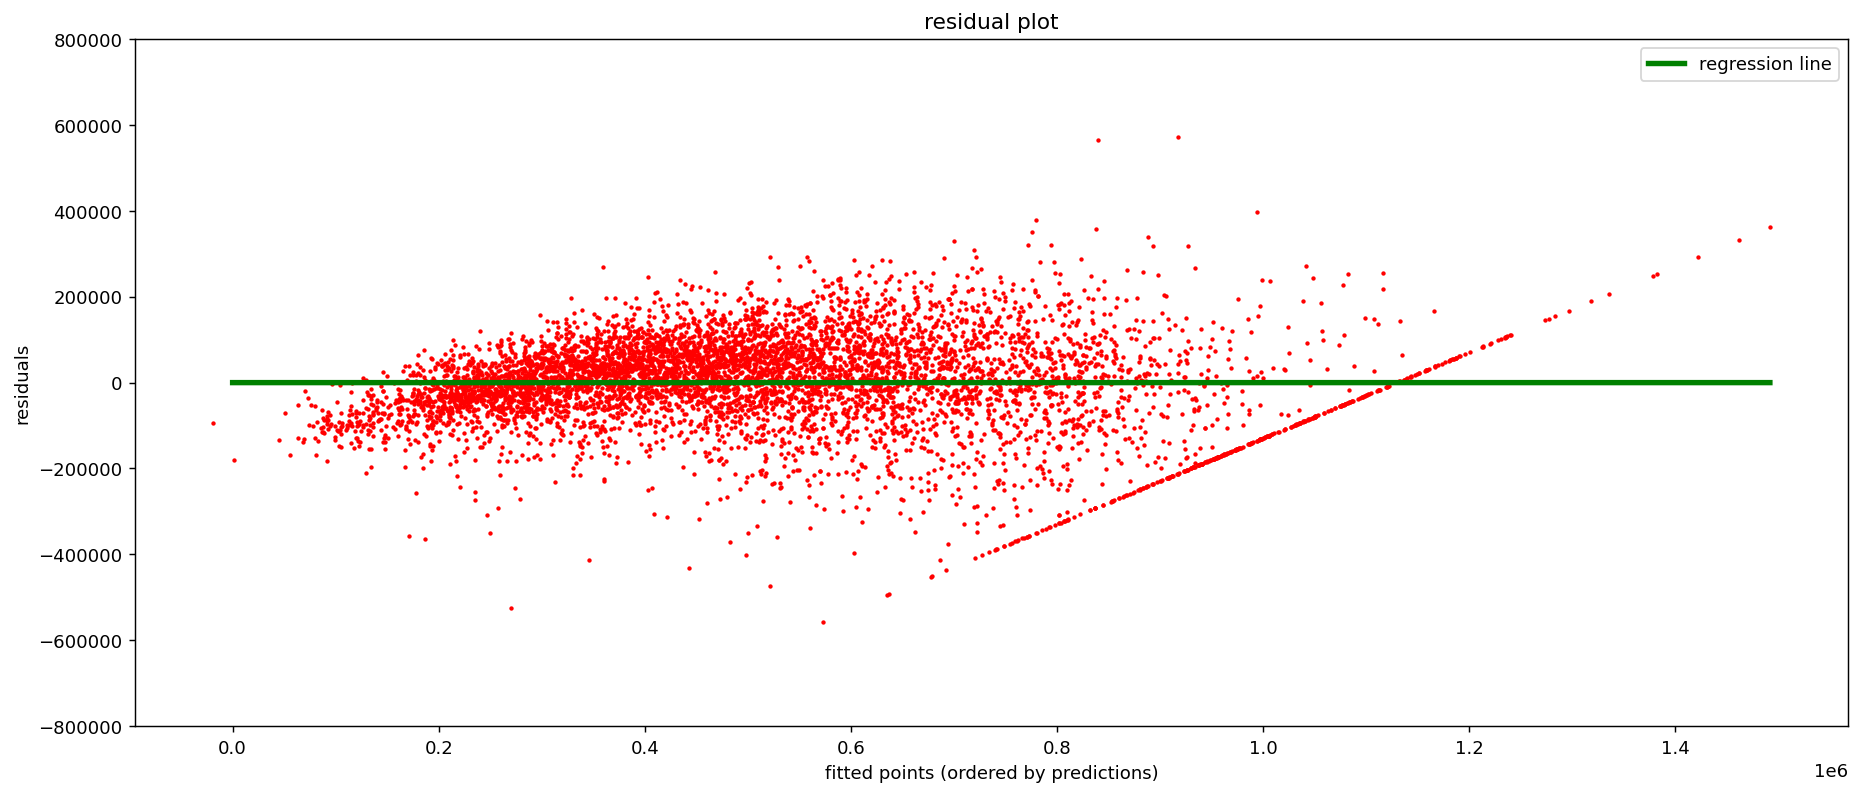

In [391]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

#  Distribution of errors

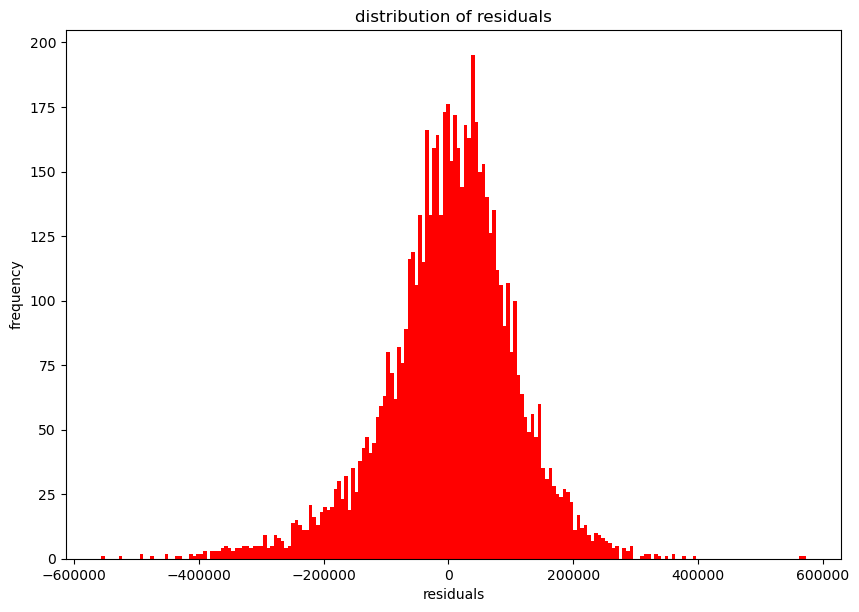

In [392]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

# Model coefficients

In [393]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')


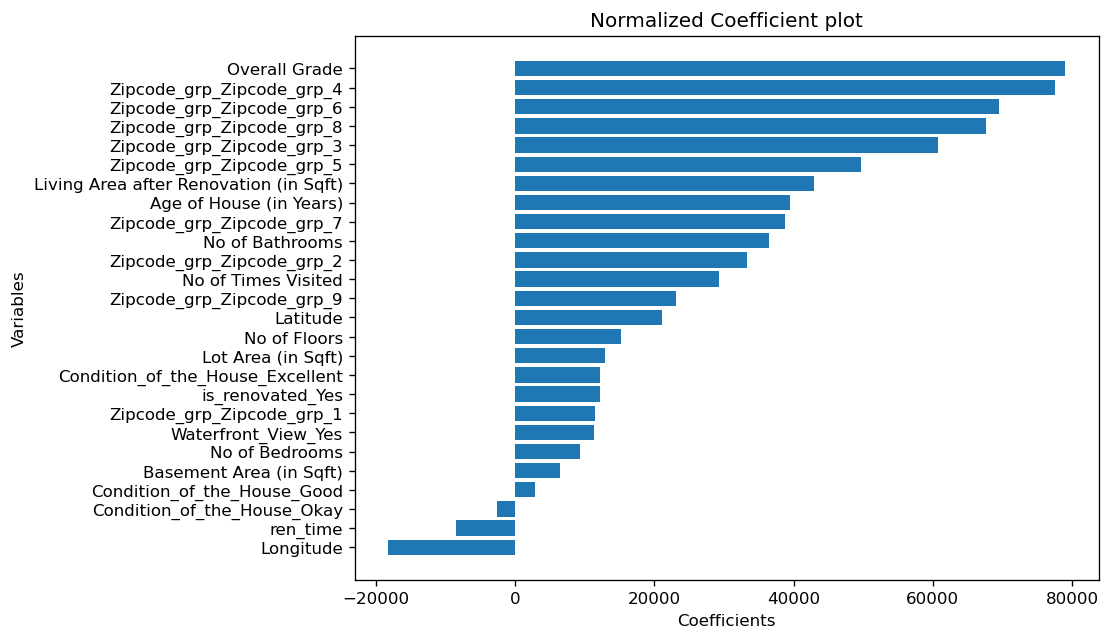

In [395]:
plt.figure(figsize=(8, 6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()